In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv.zip')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

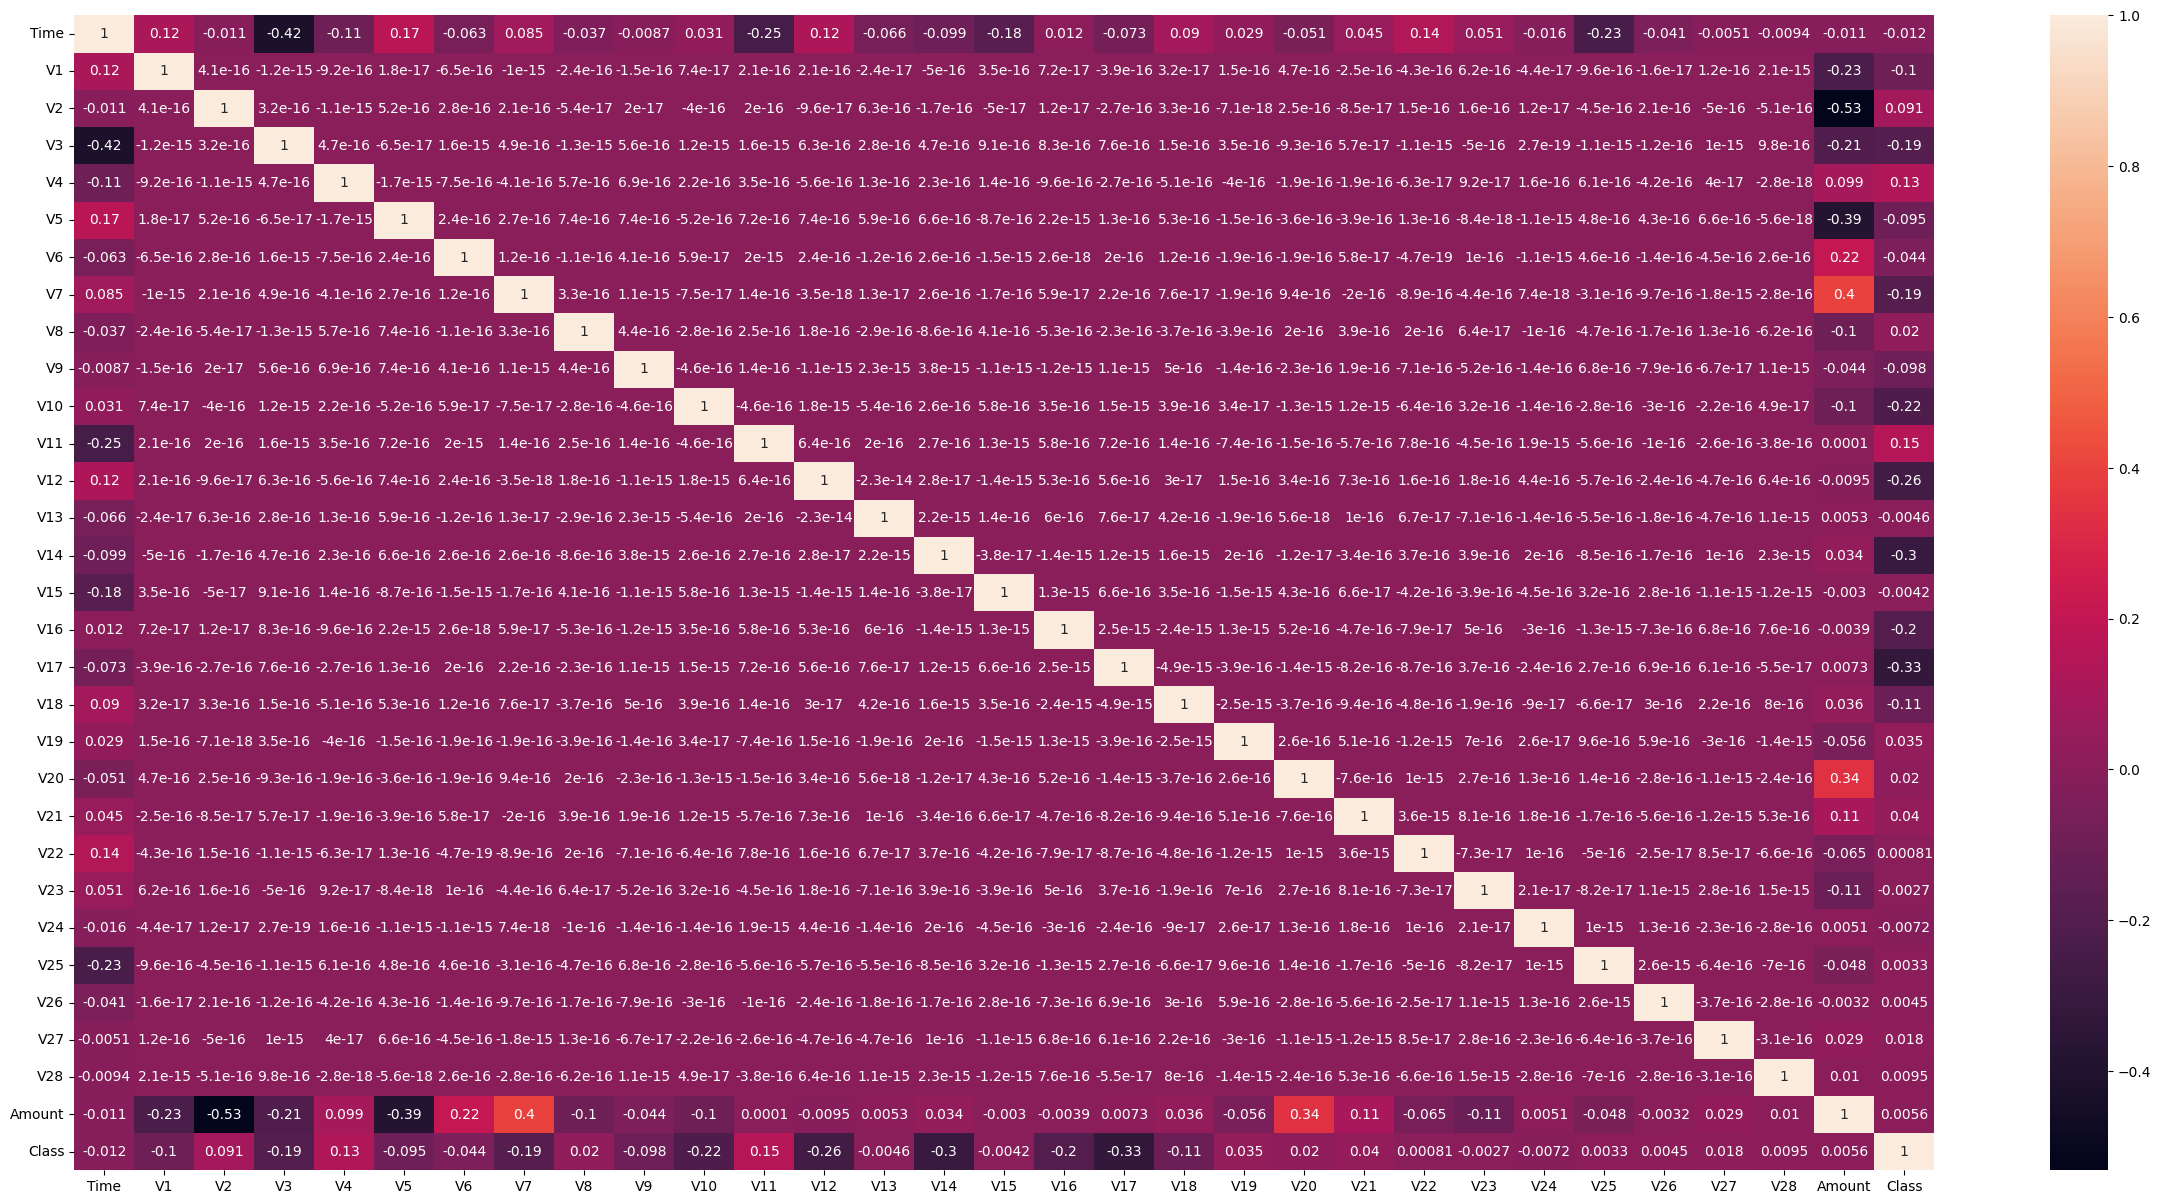

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(data=corr, annot=True)
plt.show()

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0    284315
1       492
Name: Class, dtype: int64

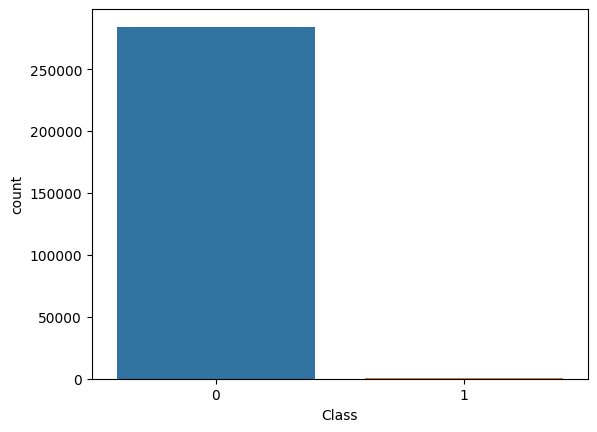

In [10]:
sns.countplot(data=data, x='Class')
data['Class'].value_counts()

### Here we can see that Data is highly imbalanced
### There are very few fraud transactions i.e 492
#### 0---> legit Transaction
#### 1---> Fraud Transaction

In [11]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


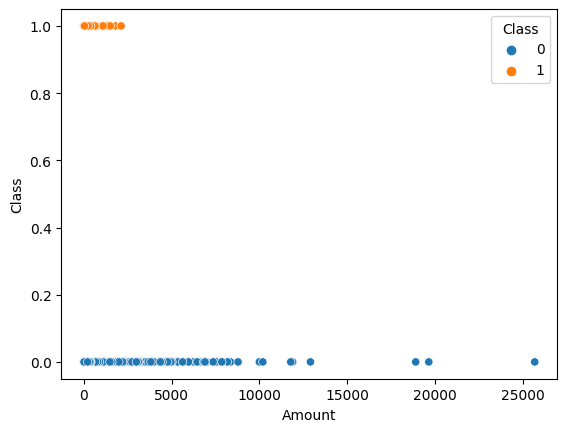

In [13]:
sns.scatterplot(data=data, x='Amount', y='Class', hue='Class')
plt.show()

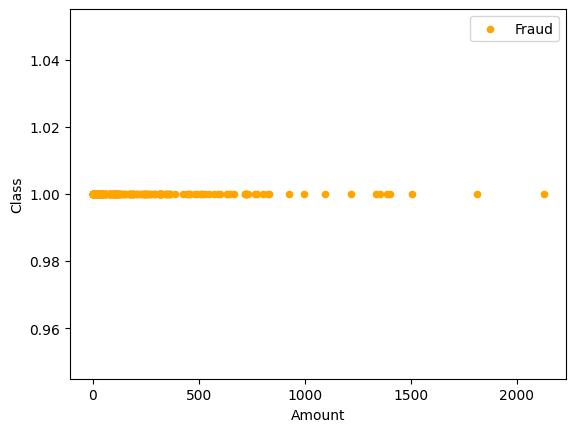

In [14]:
fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

### Statistical measures

In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# Compare the mean for both the values
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under sampling
* Undersampling is a technique in machine learning for balancing class distributions by randomly removing samples from the majority class to match the number of samples in the minority class.
* Build a sample dataset containing similar distribution of Normal and Fraud transactions
* No. of Fraud transaction ==> 492

In [18]:
legit_sample = legit.sample(n=492)

In [19]:
new_data = pd.concat([legit_sample,fraud],axis=0)

In [20]:
new_data.shape

(984, 31)

In [21]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96793.717480,-0.058466,0.115731,0.084742,-0.057370,-0.031682,0.020117,0.017991,0.087526,0.008003,...,0.048411,0.040104,0.018158,0.015570,0.033779,-0.012271,-0.014276,0.018437,0.019320,81.877724
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Splitting the data

In [23]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [24]:
print(X.shape)
print(Y.shape)

(984, 30)
(984,)


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


# Model building

## LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
# Training the Logistic Regression Model with training data
lr.fit(X_train, Y_train)

LogisticRegression()

In [32]:
# Accuracy Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Accuracy score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred1, Y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9593908629441624


In [34]:
# Precision score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred1, Y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  0.9489795918367347


In [35]:
# Recall score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred1, Y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.96875


In [36]:
# F1 score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred1, Y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.9587628865979382


## DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
# Accuracy score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred2, Y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9187817258883249


In [39]:
# Precision score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred2, Y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  0.9387755102040817


In [40]:
# Recall score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred2, Y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.9019607843137255


In [41]:
# F1 score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred2, Y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.92


## RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
# Accuracy score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred3, Y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9593908629441624


In [44]:
# Precision score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred3, Y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  0.9489795918367347


In [45]:
# Recall score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred3, Y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.96875


In [46]:
# F1 score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred3, Y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.9587628865979382


In [47]:
scores = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score': [
        accuracy_score(X_test_pred1, Y_test) * 100,
        accuracy_score(X_test_pred2, Y_test) * 100,
        accuracy_score(X_test_pred3, Y_test) * 100
    ],
    'Precision Score': [
        precision_score(X_test_pred1, Y_test) * 100,
        precision_score(X_test_pred2, Y_test) * 100,
        precision_score(X_test_pred3, Y_test) * 100
    ],
    'Recall Score': [
        recall_score(X_test_pred1, Y_test) * 100,
        recall_score(X_test_pred2, Y_test) * 100,
        recall_score(X_test_pred3, Y_test) * 100
    ],
    'F1 Score': [
        f1_score(X_test_pred1, Y_test) * 100,
        f1_score(X_test_pred2, Y_test) * 100,
        f1_score(X_test_pred3, Y_test) * 100
    ]
})

scores

,Models,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,95.939086,94.897959,96.875000,95.876289
1,Decision Tree,91.878173,93.877551,90.196078,92.000000
2,Random Forest,95.939086,94.897959,96.875000,95.876289


# Oversampling
* Oversampling using SMOTE (Synthetic Minority Over-sampling Technique) is a method in machine learning for balancing class distributions by generating synthetic examples in the minority class using nearest neighbors.

In [48]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [49]:
X = data.drop('Class',axis=1)
y = data['Class']

In [50]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [51]:
X_res.shape, y_res.shape

((568630, 30), (568630,))

In [52]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454904, 30), (113726, 30), (454904,), (113726,))

## LogisticRegression

In [55]:
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
# Accuracy score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred1, y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9721435731494997


In [57]:
# Precision score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred1, y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  0.9649852569502949


In [58]:
# Recall score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred1, y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.9791110161342024


In [59]:
# F1 score on testing data
X_test_pred1 = lr.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred1, y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.9719968178202069


## DecisionTreeClassifier

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
# Accuracy score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred2, y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9985227652427765


In [62]:
# Precision score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred2, y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  0.9991926425161471


In [63]:
# Recall score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred2, y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.9978615999439108


In [64]:
# F1 score on testing data
X_test_pred2 = dt.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred2, y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.9985266776581191


## RandomForestClassifier

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
# Accuracy score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred3, y_test)
print('Accuracy score on testing data: ',testing_data_accuracy)

Accuracy score on testing data:  0.9998944832316269


In [67]:
# Precision score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = precision_score(X_test_pred3, y_test)
print('Precision score on testing data: ',testing_data_accuracy)

Precision score on testing data:  1.0


In [68]:
# Recall score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = recall_score(X_test_pred3, y_test)
print('Recall score on testing data: ',testing_data_accuracy)

Recall score on testing data:  0.9997894293535481


In [69]:
# F1 score on testing data
X_test_pred3 = rf.predict(X_test)
testing_data_accuracy = f1_score(X_test_pred3, y_test)
print('F1 score on testing data: ',testing_data_accuracy)

F1 score on testing data:  0.9998947035906075


In [71]:
scores = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score': [
        accuracy_score(X_test_pred1, y_test) * 100,
        accuracy_score(X_test_pred2, y_test) * 100,
        accuracy_score(X_test_pred3, y_test) * 100
    ],
    'Precision Score': [
        precision_score(X_test_pred1, y_test) * 100,
        precision_score(X_test_pred2, y_test) * 100,
        precision_score(X_test_pred3, y_test) * 100
    ],
    'Recall Score': [
        recall_score(X_test_pred1, y_test) * 100,
        recall_score(X_test_pred2, y_test) * 100,
        recall_score(X_test_pred3, y_test) * 100
    ],
    'F1 Score': [
        f1_score(X_test_pred1, y_test) * 100,
        f1_score(X_test_pred2, y_test) * 100,
        f1_score(X_test_pred3, y_test) * 100
    ]
})

scores

,Models,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,97.214357,96.498526,97.911102,97.199682
1,Decision Tree,99.852277,99.919264,99.786160,99.852668
2,Random Forest,99.989448,100.000000,99.978943,99.989470


# Thank you!